<a href="https://colab.research.google.com/github/hank0705/nutn_bigdata/blob/main/%E3%80%8C0323_ipynb%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

library(SportsAnalytics)
library(ggplot2)

NBA1516<-fetch_NBAPlayerStatistics("15-16")
qplot(FieldGoalsAttempted,TotalPoints,data = NBA1516)

qplot(FieldGoalsAttempted,TotalPoints,data = NBA1516, color = Position)

In [ ]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,geom = c("point","smooth"))

In [ ]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,facets = Position~.)
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,facets = .~Position)


In [ ]:
qplot(TotalPoints, data = NBA1516,facets = Position~.,binwidth = 10)
qplot(TotalPoints, data = NBA1516,facets = .~Position,binwidth = 100)

In [ ]:
library(ggplot2)
df <- data.frame(gp = factor(rep(letters[1:3],each = 10)),y = rnorm(30))
ggplot(df,aes(x = gp,y = y))+geom_point()

In [ ]:
ggplot(df,aes(x = gp, y = y)) +geom_boxplot()

In [ ]:
df$z<-df$y+rnorm(30)
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)

In [ ]:
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)+geom_smooth()
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)+geom_smooth()

In [ ]:
ggplot(df,aes(x=z,y=y))+geom_line()+facet_grid(gp~.)
ggplot(df,aes(x=z,y=y,color=gp))+geom_line()

In [ ]:
install.packages("datasets")
install.packages("data.table")

library(datasets)
library(data.table)
airquality$Month<-as.factor(airquality$Month)
airquality.mean<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm = T)),by=Month]
ggplot()+geom_bar(data=airquality.mean,aes(x=Month,y=OzoneMean),stat="identity")

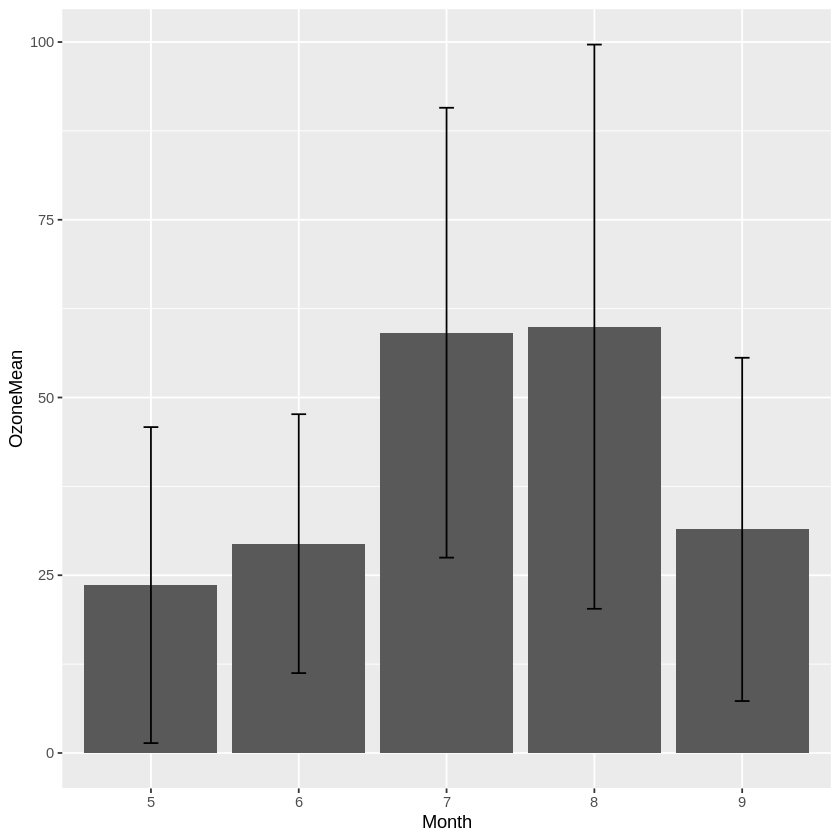

In [12]:
library(datasets)
library(data.table)
airquality$Month<-as.factor(airquality$Month)
airquality.stat<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm = T),OzoneSD=sd(Ozone,na.rm = T)),by=Month]
ggplot(data=airquality.stat)+
    geom_bar(aes(x=Month,y=OzoneMean),stat="identity")+
    geom_errorbar(
      aes(x=Month,ymin=OzoneMean-OzoneSD,ymax=OzoneMean+OzoneSD),width=.1)